<a href="https://colab.research.google.com/github/yvishyst/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [46]:
import pandas as pd
dataset_url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/tmdb_5000_movies.csv"
data_df = pd.read_csv(dataset_url)
data_df.head()
#I have downloaded the movies dataset from the github. All the columns have been named as per the columns heads in the raw data. 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [47]:
print(data_df.shape)
data_df.describe()
#There are 4803 rows with 20 features. Some of the features contain embedded features
#e.g genres,keywords etc columns have dictionary which can be further extraplotated

(4803, 20)


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [48]:
data_df.describe(exclude='number')
#Using describe for the Non Numerical columns shows NaN type as the top e.g keywords has [] as the top list , which i think should be replaced with Nan

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Out of the Blue,"Belka, the amazing flying dog is unexpectedly ...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


In [49]:
data_df.isna().sum()
#Using the isna function shows columns containing Nan values

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [50]:
#To check for null values which are filled as [] getting all non numeric column
#replacing empty square brackets with NaN

import numpy as np

data_df.replace(to_replace="[]",value=np.NaN,inplace=True)
print(data_df.isna().sum())
#Now we see that there are lot more data with Nan values

budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
spoken_languages          86
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [12]:
#Loading a dataset from UCI by first dowloading it into my local drive.
#I have downloaded poker hands data in my local drive. Will now upload it into the colabsheet

from google.colab import files
uploaded = files.upload()

Saving poker-hand-training-true.data to poker-hand-training-true.data


In [20]:
# The file poker-hand-trianing-true.data has been uploaded to the colab director
#Now reading the data into dataframe using read_csv function
#As per the data sheet the data contains 11 attributes

column_names = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Poker Hand']
poker_data = pd.read_csv("poker-hand-training-true.data",header=None,names=column_names,index_col=False)
print(poker_data.shape)
poker_data.head()

#the Data contains the same number of rows as mentioned on the website.
#Poker hand has five cards, S followed by number is suit and card number and C followed by number is value of card number

(25010, 11)


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [21]:
#Since the attributes are ordinal in nature, using describe function will not yield meaninful picture
poker_data.describe()


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker Hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [22]:
#This data does not contain any missing values
poker_data.isna().sum()

S1            0
C1            0
S2            0
C2            0
S3            0
C3            0
S4            0
C4            0
S5            0
C5            0
Poker Hand    0
dtype: int64

## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [58]:
#Using wget will upload audit data dataset into dataframe
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip"
!unzip audit_data.zip
#further the file is in zip so using the unzip command too.

--2019-08-06 21:27:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28447 (28K) [application/x-httpd-php]
Saving to: ‘audit_data.zip.1’

audit_data.zip.1    100%[===================>]  27.78K  --.-KB/s    in 0.03s   

2019-08-06 21:27:13 (895 KB/s) - ‘audit_data.zip.1’ saved [28447/28447]

Archive:  audit_data.zip
  inflating: audit_data/audit_risk.csv  
  inflating: audit_data/trial.csv    


In [61]:
audit_df = pd.read_csv("audit_data/trial.csv")
print(audit_df.shape)
audit_df.head()

(776, 18)


,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [62]:
audit_df.tail()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0
775,55.57,15,0.00,2,0.00,2,0.00,5.0,2,0.32,2,2,0,2,0,2,2.0,0


In [64]:
audit_df.isna().sum()
#There is only one missing value in the attribute Money_Value

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [66]:
audit_df.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


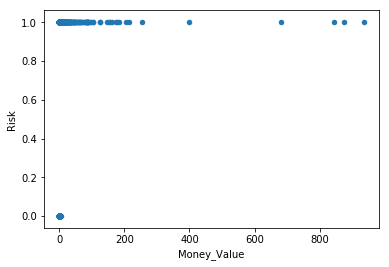

In [71]:
audit_df.plot.scatter('Money_Value','Risk');

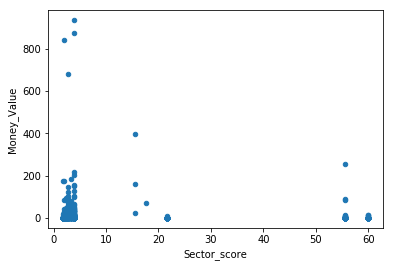

In [73]:
#Using scatter plot for Score and Risk
audit_df.plot.scatter('Sector_score','Money_Value');

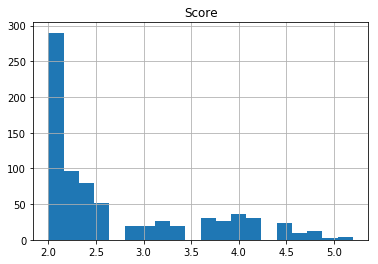

In [88]:
#using Histogram
audit_df.hist('Score',bins=20);

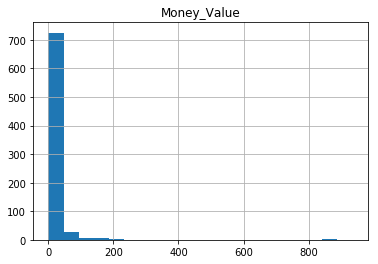

In [87]:
#using Histogram
audit_df.hist('Money_Value',bins=20);


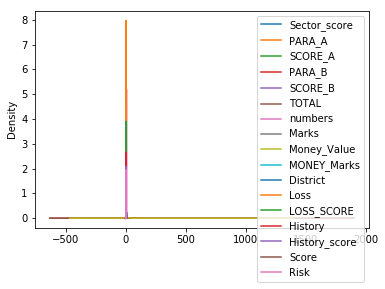

In [86]:
#Using KDE
audit_df.plot.density();

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [89]:
!curl "https://cat-fact.herokuapp.com/facts"
#This API is sending json object.

{"all":[{"_id":"5b4910ae0508220014ccfe90","text":"Cats can hear the ultrasonic noises that rodents and dolphins make to communicate.","type":"cat","user":{"_id":"5a9ac18c7478810ea6c06381","name":{"first":"Alex","last":"Wohlbruck"}},"upvotes":6,"userUpvoted":null},{"_id":"5b4911940508220014ccfe94","text":"By the time a cat is 9 years old, it will only have been awake for three years of its life.","type":"cat","user":{"_id":"5a9ac18c7478810ea6c06381","name":{"first":"Alex","last":"Wohlbruck"}},"upvotes":5,"userUpvoted":null},{"_id":"58e008ad0aac31001185ed0c","text":"The frequency of a domestic cat's purr is the same at which muscles and bones repair themselves.","type":"cat","user":{"_id":"58e007480aac31001185ecef","name":{"first":"Kasimir","last":"Schulz"}},"upvotes":5,"userUpvoted":null},{"_id":"59a60b8e6acf530020f3586e","text":"Cat owners are 17% more likely to have a graduate degree than non cat owners.","type":"cat","user":{"_id":"5a9ac18c7478810ea6c06381","name":{"first":"Alex","la

In [90]:
#using API from cat fact to read data into data frame

!wget "https://cat-fact.herokuapp.com/facts"

--2019-08-06 22:01:43--  https://cat-fact.herokuapp.com/facts
Resolving cat-fact.herokuapp.com (cat-fact.herokuapp.com)... 34.202.247.40, 18.213.66.123, 54.208.229.218, ...
Connecting to cat-fact.herokuapp.com (cat-fact.herokuapp.com)|34.202.247.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62960 (61K) [application/json]
Saving to: ‘facts’

facts               100%[===================>]  61.48K  --.-KB/s    in 0.06s   

2019-08-06 22:01:43 (988 KB/s) - ‘facts’ saved [62960/62960]



In [0]:
#Using read json to load data
catfacts_df = pd.read_json("facts")

In [131]:
catfacts_df.head()
#I am yet to convert this into a good dataframe as this data can be divided into further attributes

,all
0,"{'_id': '5b4910ae0508220014ccfe90', 'text': 'C..."
1,"{'_id': '5b4911940508220014ccfe94', 'text': 'B..."
2,"{'_id': '58e008ad0aac31001185ed0c', 'text': 'T..."
3,"{'_id': '59a60b8e6acf530020f3586e', 'text': 'C..."
4,"{'_id': '58e008b80aac31001185ed0d', 'text': 'A..."
